In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [48]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [49]:
x = data.data
y = data.target

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
print(lr.coef_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]


In [55]:
print(lr.intercept_)

151.88331005254167


In [56]:
y_pred = lr.predict(x_test)

In [57]:
from sklearn.metrics import r2_score, mean_squared_error

In [58]:
print("r2", r2_score(y_test,y_pred))

r2 0.4399338661568969


In [59]:
print("RNSe",np.sqrt(mean_squared_error(y_test,y_pred)))

RNSe 55.627840795469155


In [60]:
from sklearn.linear_model import Ridge

In [61]:
r = Ridge(alpha = 1)

In [62]:
r.fit(x_train,y_train)

Ridge(alpha=1)

In [63]:
print(r.coef_)

[  42.24252786  -57.30448273  282.1721254   198.0593951    14.36373444
  -22.55107873 -136.92968398  102.02306937  260.10429387   98.55269201]


In [64]:
print(r.intercept_)

151.75788541423188


In [65]:
y_pred1 = r.predict(x_test)

In [66]:
r2_score(y_test,y_pred1)

0.4078252224517158

In [67]:
np.sqrt(mean_squared_error(y_test,y_pred1))

57.20019371687055

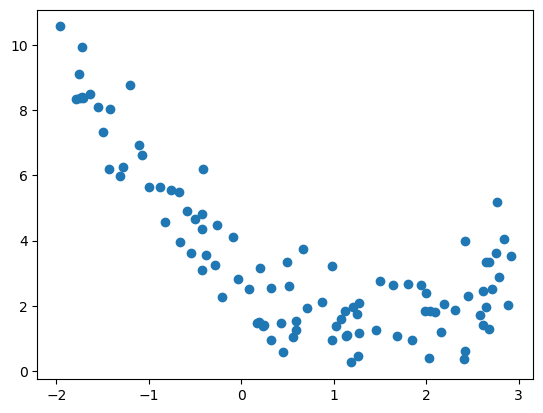

In [68]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()


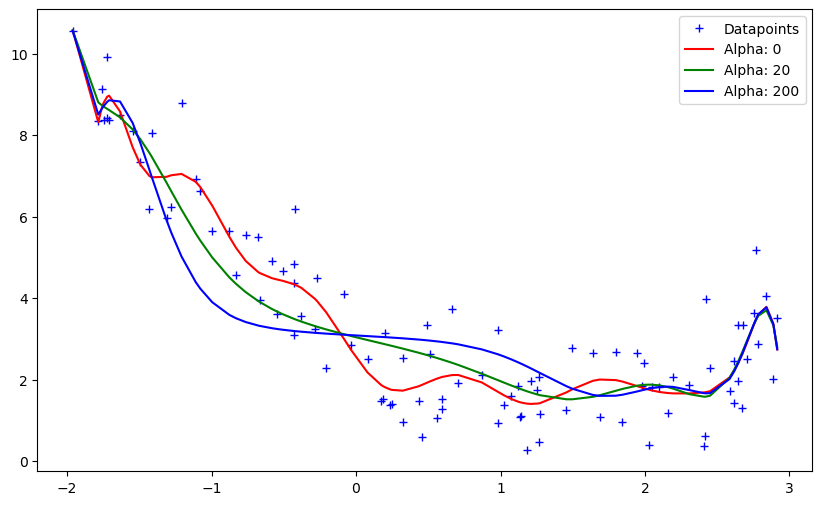

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()
